In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'Stanford/CS-229/CS_229_Project/3x3'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import MaxPooling1D, Conv1D, GlobalAveragePooling1D, Reshape
from tensorflow.keras.layers import TimeDistributed, GlobalAveragePooling2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Input, Dropout, Conv2D, BatchNormalization, MaxPool2D, Activation
from tensorflow.keras.layers import TimeDistributed as td
from tensorflow.keras.applications.resnet50 import ResNet50

from keras import backend as K
from keras.models import Model
from keras import optimizers, applications
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.utils import to_categorical
%load_ext autoreload
%autoreload 2

In [ ]:
X_train = np.load("/content/drive/My Drive/Stanford/CS-229/CS_229_Project/3x3/X_train.npy")
y_train = np.load("/content/drive/My Drive/Stanford/CS-229/CS_229_Project/3x3/y_train.npy")
X_val = np.load("/content/drive/My Drive/Stanford/CS-229/CS_229_Project/3x3/X_val.npy")
y_val = np.load("/content/drive/My Drive/Stanford/CS-229/CS_229_Project/3x3/y_val.npy")
X_test = np.load("/content/drive/My Drive/Stanford/CS-229/CS_229_Project/3x3/X_test.npy")
y_test = np.load("/content/drive/My Drive/Stanford/CS-229/CS_229_Project/3x3/y_test.npy")

In [ ]:
batch_size = 64
lr = 0.001
decay_rate = 0.95
decay_step = 100
num_epoch = 8

In [ ]:
input_tensor = Input(shape=(201,201,3))
base_model = ResNet50(
  weights='imagenet', 
  include_top=False,
  input_tensor=input_tensor)

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(81)(x)
x = Reshape((9, 9))(x)
final_output = Activation('softmax')(x)
model = Model(input_tensor, final_output)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=lr,
    decay_steps=decay_step,
    decay_rate=decay_rate,
    staircase=False,
    name=None
)

adam = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(
    X_train,
    y_train,
    epochs=num_epoch,
    batch_size=batch_size,
    verbose=1,
    validation_data=(X_val, y_val))

Epoch 1/8
938/938 [==============================] - 277s 284ms/step - loss: 2.0790 - accuracy: 0.1701 - val_loss: 1.8744 - val_accuracy: 0.2491
Epoch 2/8
938/938 [==============================] - 265s 283ms/step - loss: 1.6609 - accuracy: 0.3387 - val_loss: 1.5377 - val_accuracy: 0.3919
Epoch 3/8
938/938 [==============================] - 265s 283ms/step - loss: 1.3319 - accuracy: 0.4790 - val_loss: 1.2547 - val_accuracy: 0.5184
Epoch 4/8
938/938 [==============================] - 265s 282ms/step - loss: 1.0610 - accuracy: 0.5987 - val_loss: 1.0695 - val_accuracy: 0.5979
Epoch 5/8
938/938 [==============================] - 265s 282ms/step - loss: 0.8424 - accuracy: 0.6871 - val_loss: 1.0010 - val_accuracy: 0.6310
Epoch 6/8
938/938 [==============================] - 265s 283ms/step - loss: 0.6634 - accuracy: 0.7569 - val_loss: 1.0103 - val_accuracy: 0.6385
Epoch 7/8
938/938 [==============================] - 265s 282ms/step - loss: 0.5214 - accuracy: 0.8116 - val_loss: 1.0606 - val_ac

In [ ]:
model.save("/content/drive/My Drive/Stanford/CS-229/CS_229_Project/3x3/ResNet_3x3_8epoch_0.001.h5")

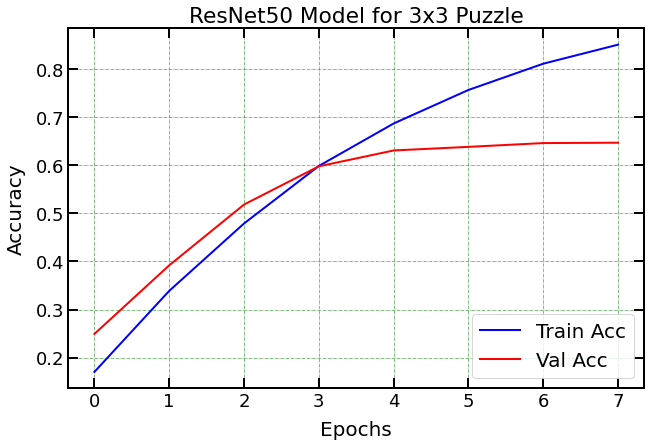

In [ ]:
# Rebuild the matplotlib font cache
#fm._rebuild()
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans' # font
plt.rcParams['font.size'] = 18         # font size
plt.rcParams['axes.linewidth'] = 2     # axes width

fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])    # Add axes object to our figure that takes up entire figure
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.plot(history.history["accuracy"], linewidth=2, color='b', label="Train Acc", alpha = 1)
ax.plot(history.history["val_accuracy"], linewidth=2, color='r', label="Val Acc", alpha = 1)
ax.set_ylabel('Accuracy', labelpad=10, fontsize=20)
ax.set_xlabel('Epochs', labelpad=10, fontsize=20)
ax.grid(color='g', ls = '-.', lw = 0.5)
plt.legend(loc="lower right", fontsize=20)
plt.title("ResNet50 Model for 3x3 Puzzle")
plt.savefig('/content/drive/My Drive/Stanford/CS-229/CS_229_Project/3x3/ResNetAcc_3x3_8epoch_0.001.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

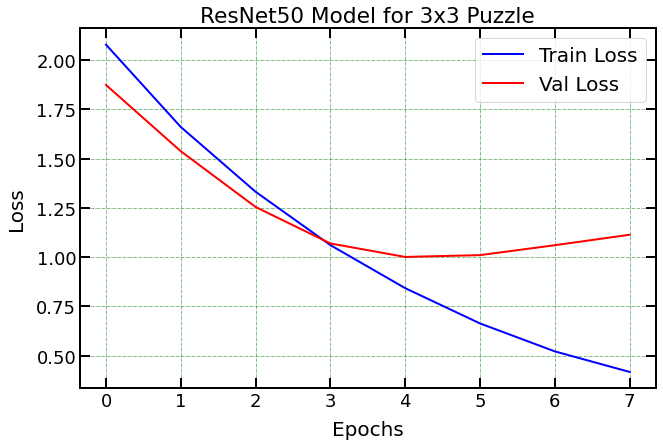

In [ ]:
# Rebuild the matplotlib font cache
#fm._rebuild()
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans' # font
plt.rcParams['font.size'] = 18         # font size
plt.rcParams['axes.linewidth'] = 2     # axes width

fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])    # Add axes object to our figure that takes up entire figure
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.plot(history.history["loss"], linewidth=2, color='b', label="Train Loss", alpha = 1)
ax.plot(history.history["val_loss"], linewidth=2, color='r', label="Val Loss", alpha = 1)
ax.set_ylabel('Loss', labelpad=10, fontsize=20)
ax.set_xlabel('Epochs', labelpad=10, fontsize=20)
ax.grid(color='g', ls = '-.', lw = 0.5)
plt.legend(loc="upper right", fontsize=20)
plt.title("ResNet50 Model for 3x3 Puzzle")
plt.savefig('/content/drive/My Drive/Stanford/CS-229/CS_229_Project/3x3/ResNetLoss_3x3_8epoch_0.001.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()